In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X,y=datasets.load_boston(return_X_y=True)

X_train=X[0:400,:]
y_train=y[0:400]

X_test=X[400:506,:]
y_test=y[400:506]

scaler=StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(400, 13)

In [3]:
dummy=(np.ones([400,1],dtype=int))
X_train=np.concatenate((dummy,X_train),axis=1)
dummy_test=(np.ones([106,1],dtype=int))
X_test=np.concatenate((dummy_test,X_test),axis=1)

In [4]:
print("1. Stochastic Gradient Descent")
print("2. Batch Gradient Descent")
print("3. Mini-Batch Gradient Descent")

ch=eval(input("Enter your choice "))

1. Stochastic Gradient Descent
2. Batch Gradient Descent
3. Mini-Batch Gradient Descent
Enter your choice 1


In [5]:
epochs=eval(input("Enter number of epochs "))

Enter number of epochs 200


In [6]:
#Mean-Squared-Error loss
def calculate_error(theta):
    error=0
    for i in range(y_test.shape[0]):
        error+=np.square(np.dot(theta.transpose(),X_test[i])-y_test[i])
    mse=error/y_test.shape[0]
    return mse

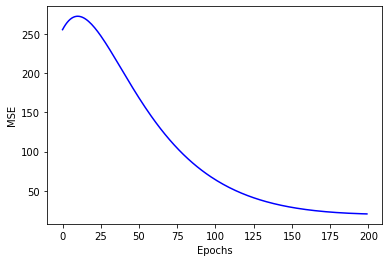

In [7]:
theta=np.random.rand(14,1)

alpha=0.01

temp=np.ndarray([14,1])

if ch==1:
    y=[]
    for epoch in range(epochs):
        for j in range(14):
            add=0
            for i in range(y_train.shape[0]):
                add+=(np.dot(theta.transpose(),X_train[i].reshape([14,1])) - y_train[i])*X_train[i][j]
            temp[j] = theta[j] - (alpha/400)*(add)
            theta=temp   
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
if ch==2:
    y=[]
    for epoch in range(epochs):
        for j in range(14):
            add=0
            for i in range(y_train.shape[0]):
                add+=(np.dot(theta.transpose(),X_train[i].reshape([14,1])) - y_train[i])*X_train[i][j]
            temp[j] = theta[j] - (alpha/400)*(add)
        theta=temp
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
if ch==3:
    y=[]
    batch_size=eval(input("Enter the batch size "))
    batches=y_train.shape[0]//batch_size
    for epoch in range(epochs):
        for j in range(14):
            add=0
            for batch in range(batches):
                for i in range(batch*batch_size,batch*batch_size+batch_size):
                    add+=(np.dot(theta.transpose(),X_train[i].reshape([14,1])) - y_train[i])*X_train[i][j]
                temp[j] = theta[j] - (alpha/batch_size)*(add)
                theta=temp    
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()